# Датасет https://www.kaggle.com/datasets/vetrirah/customer


Постановка задачи:
Из множества элементов $X = \{x_1, x_2, \dots x_m\}$ , каждый из которых характеризуется набором признаков $𝐷= \{d_1, d_2, \dots d_n\}$ , выделить совокупность подмножеств (кластеров) $C= \{c_1, c_2, \dots c_p\}$ в соответствии с критерием сходства элементов $S_{ik}$.


# Описание алгоритма кластеризации методом Корреляционных плеяд из книги И.Д. Манделя "Кластерный Анализ"


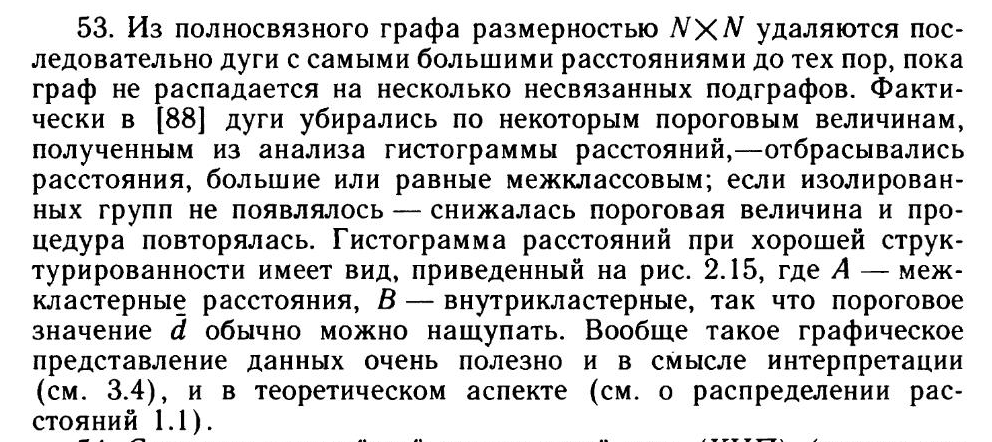


# Предобработка данных


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats


data = pd.read_csv('Train.csv').dropna().drop(['Profession', 'Var_1', 'ID', 'Segmentation'],axis=1)
data

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,1.0,Low,4.0
2,Female,Yes,67,Yes,1.0,Low,1.0
3,Male,Yes,67,Yes,0.0,High,2.0
5,Male,Yes,56,No,0.0,Average,2.0
6,Male,No,32,Yes,1.0,Low,3.0
...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,0.0,High,5.0
8064,Male,No,35,No,3.0,Low,4.0
8065,Female,No,33,Yes,1.0,Low,1.0
8066,Female,No,27,Yes,1.0,Low,4.0


In [81]:
data['Work_Experience'].describe()

count    6665.000000
mean        2.629107
std         3.405365
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: Work_Experience, dtype: float64

In [82]:
data['Gender'] = data['Gender'].apply(lambda x: 0 if x == 'Female' else 1)
data['Ever_Married'] = data['Ever_Married'].apply(lambda x: 0 if x == 'No' else 1)
data['Graduated'] = data['Graduated'].apply(lambda x: 0 if x == 'No' else 1)
data['Spending_Score'] = data['Spending_Score'].apply(lambda x: 0 if x == 'Low' else 1 if x == 'Average' else 2)

In [4]:
data['age'] = data['age'].apply(lambda x: float(x))

C:\Users\po6wi\AppData\Local\Temp\ipykernel_7408\2588921545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].apply(lambda x: float(x))


In [83]:
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
0,1,0,22,0,1.0,0,4.0
2,0,1,67,1,1.0,0,1.0
3,1,1,67,1,0.0,2,2.0
5,1,1,56,0,0.0,1,2.0
6,1,0,32,1,1.0,0,3.0
...,...,...,...,...,...,...,...
8062,1,1,41,1,0.0,2,5.0
8064,1,0,35,0,3.0,0,4.0
8065,0,0,33,1,1.0,0,1.0
8066,0,0,27,1,1.0,0,4.0


# Матрица объект - признак


In [84]:
from sklearn.preprocessing import MinMaxScaler
int_columns = data.select_dtypes(include=['float','int'])
print(int_columns.columns)

scaler = MinMaxScaler().fit(int_columns)
features = scaler.transform(int_columns)
data = pd.DataFrame(features, columns=int_columns.columns)
data

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Spending_Score', 'Family_Size'],
      dtype='object')


,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
0,1.0,0.0,0.056338,0.0,0.083333,0.0,0.500000
1,0.0,1.0,0.690141,1.0,0.083333,0.0,0.000000
2,1.0,1.0,0.690141,1.0,0.000000,1.0,0.166667
3,1.0,1.0,0.535211,0.0,0.000000,0.5,0.166667
4,1.0,0.0,0.197183,1.0,0.083333,0.0,0.333333
...,...,...,...,...,...,...,...
6496,1.0,1.0,0.323944,1.0,0.000000,1.0,0.666667
6497,1.0,0.0,0.239437,0.0,0.250000,0.0,0.500000
6498,0.0,0.0,0.211268,1.0,0.083333,0.0,0.000000
6499,0.0,0.0,0.126761,1.0,0.083333,0.0,0.500000


In [85]:
data = data.sample(n=6501, random_state=1)

In [86]:
X = data[0:2500]
X

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
3773,0.0,1.0,0.690141,1.0,0.083333,0.5,0.166667
6013,1.0,1.0,0.661972,0.0,0.083333,0.0,0.000000
3464,0.0,0.0,0.394366,1.0,0.083333,0.0,0.000000
1518,1.0,0.0,0.492958,1.0,0.000000,0.0,0.166667
3762,0.0,1.0,0.309859,1.0,0.083333,0.5,0.166667
...,...,...,...,...,...,...,...
5787,1.0,1.0,0.394366,1.0,0.666667,0.5,0.166667
4563,0.0,0.0,0.014085,0.0,0.083333,0.0,0.500000
5877,1.0,1.0,0.676056,1.0,0.083333,1.0,0.166667
1542,1.0,0.0,0.126761,1.0,0.666667,0.0,0.500000


# Меры близости


In [32]:
import math

def compute_distance_matrix(data, metric):
    """
    Строит матрицу расстояний для набора объектов.
    data — список точек: [[x1, y1, ...], [x2, y2, ...], ...]
    Возвращает квадратную матрицу расстояний.
    """
    n = len(data)
    matrix = [[0.0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if i != j:
                if metric == 'euclidean':
                    dist = euclidean_distance2(data[i], data[j])
                if metric == 'manhattan':
                    dist = manhattan_distance(data[i], data[j])
                if metric == 'chebyshev':
                    dist = chebyshev_distance(data[i], data[j])
                if metric == 'minkowski':
                    dist = minkowski_distance(data[i], data[j], 2, 3)
                if metric == 'mahalanobis':
                    dist = mahalanobis_distance(data[i], data[j], cov_inv)
                if metric == 'spearman':
                    dist = spearman_rank_correlation(data[i], data[j])
                if metric == 'kendall':
                    dist = kendall_tau(data[i], data[j])
                if metric == 'pearson':
                    dist = pearson_correlation(data[i], data[j])
                matrix[i][j] = dist
            else:
                matrix[i][j] = 0.0  # расстояние до себя

    return matrix

def euclidean_distance(p1, p2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))
def euclidean_distance2(p1, p2):
    return sum((a - b) ** 2 for a, b in zip(p1, p2))
def manhattan_distance(p1, p2):
    return sum(abs(a - b) for a, b in zip(p1, p2))
def chebyshev_distance(p1, p2):
    return max(abs(a - b) for a, b in zip(p1, p2))
def minkowski_distance(p1, p2, p, r):
    return sum(abs(a - b) ** p for a, b in zip(p1, p2)) ** (1 / r)
def mahalanobis_distance(p1, p2, cov_inv):
    delta = np.array(p1) - np.array(p2)
    return np.sqrt(np.dot(np.dot(delta.T, cov_inv), delta))
def spearman_rank_correlation(x, y):
    n = len(x)
    rank_x = {val: rank for rank, val in enumerate(sorted(x), 1)}
    rank_y = {val: rank for rank, val in enumerate(sorted(y), 1)}
    d_squared = sum((rank_x[a] - rank_y[b]) ** 2 for a, b in zip(x, y))
    return 1 - (6 * d_squared) / (n * (n**2 - 1))
def kendall_tau(x, y):
    n = len(x)
    concordant = discordant = 0
    for i in range(n):
        for j in range(i + 1, n):
            a = x[i] - x[j]
            b = y[i] - y[j]
            if a * b > 0:
                concordant += 1
            elif a * b < 0:
                discordant += 1
    return (concordant - discordant) / (0.5 * n * (n - 1))
def pearson_correlation(x, y):
    n = len(x)
    mean_x = sum(x) / n
    mean_y = sum(y) / n
    num = sum((a - mean_x) * (b - mean_y) for a, b in zip(x, y))
    den_x = sum((a - mean_x) ** 2 for a in x)
    den_y = sum((b - mean_y) ** 2 for b in y)
    return num / math.sqrt(den_x * den_y)




# Матрица объект - объект


In [87]:
X_t = compute_distance_matrix(X.values, 'euclidean')
pd.DataFrame(X_t)

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.000000,2.278571,1.365260,2.295826,0.144614,1.259720,0.027976,0.596013,1.965230,2.037896,...,2.919758,1.439656,2.827096,2.300784,0.335506,1.427760,2.818163,1.250198,3.018786,1.175384
1,2.278571,0.000000,3.071613,2.063288,2.401761,2.043846,2.362896,3.523794,3.660473,0.375197,...,2.828495,3.253152,2.679484,0.733326,2.045826,1.689668,2.669758,2.027976,2.876729,1.550784
2,1.365260,3.071613,0.000000,1.044443,1.284919,3.183302,1.457124,2.444643,0.483326,3.492039,...,1.568428,0.143848,1.411878,3.699404,1.011904,2.618056,1.394614,3.107127,1.661891,2.501785
3,2.295826,2.063288,1.044443,0.000000,2.290470,4.094427,2.329356,3.269640,1.677760,2.342051,...,2.460079,1.118844,2.389640,2.507738,2.028571,1.704165,2.347375,2.040470,0.689656,1.371230
4,0.144614,2.401761,1.284919,2.290470,0.000000,1.479320,0.183302,0.504959,1.734918,2.225359,...,2.571613,1.305754,2.468238,2.274003,0.308725,1.347419,2.448594,1.384100,2.734914,1.127179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.427760,1.689668,2.618056,1.704165,1.347419,2.745802,1.464068,1.840476,2.323603,1.596206,...,3.964261,2.456348,3.668823,1.595237,1.727182,0.000000,3.846003,0.669627,1.432724,0.453174
2496,2.818163,2.669758,1.394614,2.347375,2.448594,2.711190,2.754072,3.161878,1.727970,2.821124,...,0.028571,1.151568,0.027976,2.480912,2.460079,3.846003,0.000000,4.549318,2.352974,3.428536
2497,1.250198,2.027976,3.107127,2.040470,1.384100,2.012696,1.278571,1.337483,3.701542,1.289682,...,4.651706,3.179539,4.558647,1.544634,2.079356,0.669627,4.549318,0.000000,2.753115,0.418441
2498,3.018786,2.876729,1.661891,0.689656,2.734914,4.889596,2.951521,3.432329,1.261904,3.106273,...,2.375197,1.240270,2.183331,2.732319,2.808707,1.432724,2.352974,2.753115,0.000000,1.686290


In [88]:
from sklearn.metrics import calinski_harabasz_score

In [89]:
def build_distance_histogram(distance_matrix, bins=20):
    n = len(distance_matrix)
    distances = []
    
    for i in range(n):
        for j in range(i + 1, n):
            distances.append(distance_matrix[i][j])

    # Определяем минимальное и максимальное расстояние
    min_d = min(distances)
    max_d = max(distances)
    step = (max_d - min_d) / bins

    histogram = [0] * bins

    for d in distances:
        index = int((d - min_d) / step)
        if index == bins:
            index -= 1  # включаем правую границу в последний столбец
        histogram[index] += 1

    # Вывод гистограммы в консоль
    binss = []
    counts = []
    print("Гистограмма расстояний:")
    for i in range(bins):
        left = min_d + i * step
        right = left + step
        counts.append(histogram[i])
        binss.append(f"[{left:.2f}, {right:.2f})")
    plt.barh(binss, counts, color='skyblue')
    plt.xlabel('Количество')
    plt.ylabel('Интервалы')
    plt.tight_layout()
    plt.show()

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def compute_within_cluster_distance(distance_matrix, clusters):
    """
    Вычисляет сумму внутрикластерных расстояний.
    """
    
    total = 0
    for cluster in clusters:
        center = np.mean(X.iloc[cluster], axis=0)
        for i in cluster:
            v = np.array(X.iloc[i]) - np.array(center)
            total += np.dot(v, v)
    return total

def elbow_for_correlation_pleiades(distance_matrix, thresholds):
    """
    Метод локтя для метода корреляционных плеяд.
    :param distance_matrix: матрица расстояний (или 1 - корреляций)
    :param thresholds: список порогов для кластеризации
    """
    scores = []
    lengths = []
    for t in thresholds:
        clustering = CorrelationPleiadesClusteringSimple(distance_matrix)
        clusters = clustering.cluster_with_threshold(t)
        lengths.append(len(clusters))
        score = compute_within_cluster_distance(distance_matrix, clusters)
        scores.append(score)
        print(f"Порог: {t:.2f}, Кластеры: {len(clusters)}, Ошибка: {score:.4f}")

    # Построение графика локтя
    plt.figure(figsize=(8, 4))
    plt.plot(lengths, scores, 'bo-')
    plt.xlabel('Число кластеров')
    plt.ylabel('Общий внутрикластерный разброс W_total')
    plt.title('Метод локтя для корреляционных плеяд')
    plt.grid(True)
    plt.show()

    return scores


In [91]:
class CorrelationPleiadesClusteringSimple:
    def __init__(self, distance_matrix):
        self.distance_matrix = distance_matrix
        self.n = len(distance_matrix)
        self.graph = [[True if i != j else False for j in range(self.n)] for i in range(self.n)]

    def cluster_with_threshold(self, threshold):
        for i in range(self.n):
            for j in range(i + 1, self.n):
                if self.distance_matrix[i][j] >= threshold:
                    self.graph[i][j] = False
                    self.graph[j][i] = False
        return self.get_connected_components()

    def get_connected_components(self):
        visited = [False] * self.n
        components = []

        def dfs(node, component):
            visited[node] = True
            component.append(node)
            for neighbor in range(self.n):
                if self.graph[node][neighbor] and not visited[neighbor]:
                    dfs(neighbor, component)

        for i in range(self.n):
            if not visited[i]:
                component = []
                dfs(i, component)
                components.append(component)

        return components


In [92]:
def global_stopping_rule_calinski_custom(distance_matrix, data_points, threshold_range):
    """
    Глобальное правило остановки по Calinski-Harabasz для кастомной кластеризации.

    Parameters:
        distance_matrix : np.ndarray
            Матрица попарных расстояний между точками (n x n)
        data_points : np.ndarray
            Оригинальные данные (n_samples, n_features)
        threshold_range : list or np.ndarray
            Список порогов, которые будут протестированы

    Returns:
        best_threshold : float
            Порог с максимальным индексом Калинского-Харабаса
        scores : dict
            Словарь: {threshold: score}
    """
    scores = {}
    best_score = -1
    best_threshold = None
    lengths = []
    for threshold in threshold_range:
        clustering = CorrelationPleiadesClusteringSimple(distance_matrix)
        components = clustering.cluster_with_threshold(threshold)
        

        # Пропускаем, если все данные попали в один кластер или каждый — в свой
        if len(components) <= 1 or len(components) == len(data_points):
            continue
        lengths.append(len(components))

        # Построим список меток кластеров
        labels = np.empty(len(data_points), dtype=int)
        for cluster_id, component in enumerate(components):
            for idx in component:
                labels[idx] = cluster_id

        # Вычисляем индекс Калинского-Харабаса
        score = calinski_harabasz_score(data_points, labels)
        scores[threshold] = score

        print(f"Threshold={threshold:.2f}, Clusters={len(components)}, CH Score={score:.2f}")

        if score > best_score:
            best_score = score
            best_threshold = threshold

    print(f"\n✅ Best threshold by Calinski-Harabasz Index: {best_threshold:.2f} with score {best_score:.2f}")
    plt.figure(figsize=(8, 4))
    plt.plot(lengths, list(scores.values()), 'bo-')
    plt.xlabel('Число кластеров')
    plt.ylabel('Calinski-Harabasz Index')
    plt.title('Best threshold by Calinski-Harabasz Index')
    plt.grid(True)
    plt.show()

    return best_threshold, scores


# Гистограмма расстояний


Гистограмма расстояний:


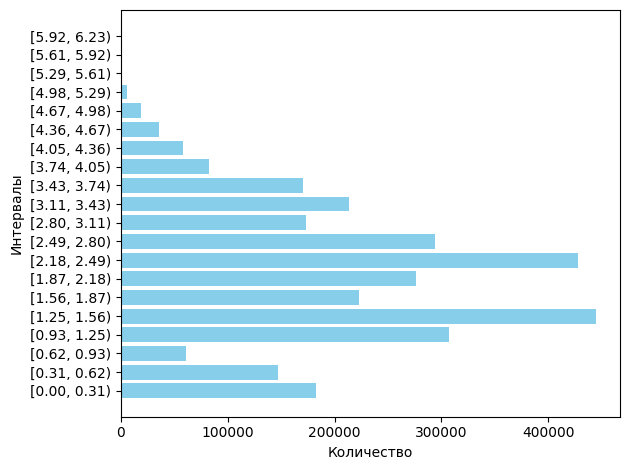

In [93]:
build_distance_histogram(X_t)

# Оптимальное число кластеров по методу локтя


Порог: 1.10, Кластеры: 1, Ошибка: 2596.8630
Порог: 1.02, Кластеры: 1, Ошибка: 2596.8630
Порог: 0.94, Кластеры: 8, Ошибка: 603.6232
Порог: 0.86, Кластеры: 8, Ошибка: 603.6232
Порог: 0.79, Кластеры: 8, Ошибка: 603.6232
Порог: 0.71, Кластеры: 8, Ошибка: 603.6232
Порог: 0.63, Кластеры: 8, Ошибка: 603.6232
Порог: 0.55, Кластеры: 8, Ошибка: 603.6232
Порог: 0.47, Кластеры: 8, Ошибка: 603.6232
Порог: 0.39, Кластеры: 8, Ошибка: 603.6232
Порог: 0.31, Кластеры: 8, Ошибка: 603.6232
Порог: 0.24, Кластеры: 18, Ошибка: 376.4713
Порог: 0.16, Кластеры: 20, Ошибка: 374.9111
Порог: 0.08, Кластеры: 42, Ошибка: 359.2667
Порог: 0.00, Кластеры: 2500, Ошибка: 0.0000


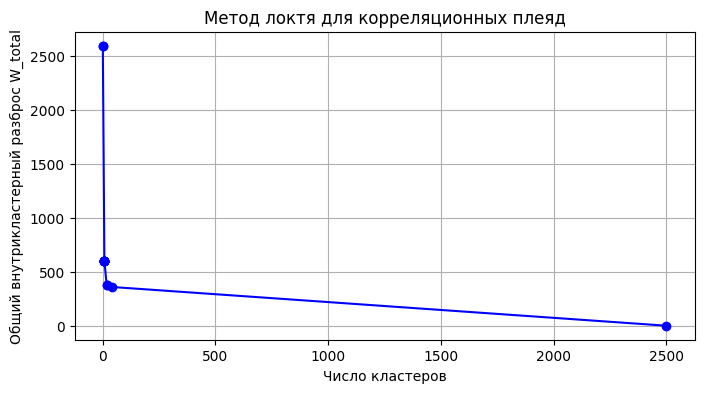

[2596.863013326279,
 2596.8630133262786,
 603.623246707972,
 603.623246707972,
 603.623246707972,
 603.6232467079722,
 603.6232467079723,
 603.623246707972,
 603.623246707972,
 603.6232467079719,
 603.6232467079718,
 376.47133279581345,
 374.91111998964277,
 359.26665927298643,
 0.0]

In [94]:
thresholds = np.linspace(0, 1.1, num=15)
elbow_for_correlation_pleiades(X_t, thresholds[::-1])

# Индекс Калински - Харабас


Threshold=0.94, Clusters=8, CH Score=1175.56
Threshold=0.86, Clusters=8, CH Score=1175.56
Threshold=0.79, Clusters=8, CH Score=1175.56
Threshold=0.71, Clusters=8, CH Score=1175.56
Threshold=0.63, Clusters=8, CH Score=1175.56
Threshold=0.55, Clusters=8, CH Score=1175.56
Threshold=0.47, Clusters=8, CH Score=1175.56
Threshold=0.39, Clusters=8, CH Score=1175.56
Threshold=0.31, Clusters=8, CH Score=1175.56
Threshold=0.24, Clusters=18, CH Score=861.09
Threshold=0.16, Clusters=20, CH Score=773.58
Threshold=0.08, Clusters=42, CH Score=373.39

✅ Best threshold by Calinski-Harabasz Index: 0.94 with score 1175.56


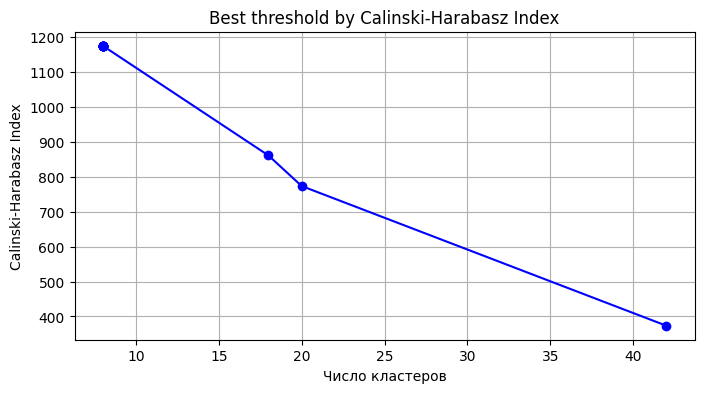

In [95]:
thresholds = np.linspace(0, 1.1, num=15)
best_threshold, score_dict = global_stopping_rule_calinski_custom(X_t, X, thresholds[::-1])

In [96]:
clustering = CorrelationPleiadesClusteringSimple(X_t)
components = clustering.cluster_with_threshold(0.31)

In [97]:
len(components[3])

238

# Анализ кластеров


# Сегмент 1


In [98]:
pd.DataFrame(scaler.inverse_transform(X.iloc[components[0]]),columns=X.columns).describe()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
count,437.0,437.0,437.000000,437.0,437.000000,437.000000,437.000000
mean,0.0,1.0,53.043478,1.0,2.377574,0.986270,2.606407
std,0.0,0.0,15.239387,0.0,3.077255,0.738703,1.241764
min,0.0,1.0,20.000000,1.0,0.000000,0.000000,1.000000
25%,0.0,1.0,41.000000,1.0,0.000000,0.000000,2.000000
50%,0.0,1.0,50.000000,1.0,1.000000,1.000000,2.000000
75%,0.0,1.0,63.000000,1.0,4.000000,2.000000,3.000000
max,0.0,1.0,89.000000,1.0,12.000000,2.000000,7.000000


# Сегмент 2


In [116]:
pd.DataFrame(scaler.inverse_transform(X.iloc[components[1]]),columns=X.columns).describe()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
count,259.0,259.0,259.000000,259.0,259.000000,259.000000,259.000000
mean,1.0,1.0,51.305019,0.0,2.181467,0.915058,2.922780
std,0.0,0.0,16.913242,0.0,3.089411,0.787822,1.341721
min,1.0,1.0,19.000000,0.0,0.000000,0.000000,1.000000
25%,1.0,1.0,38.500000,0.0,0.000000,0.000000,2.000000
50%,1.0,1.0,49.000000,0.0,1.000000,1.000000,3.000000
75%,1.0,1.0,65.000000,0.0,2.000000,2.000000,4.000000
max,1.0,1.0,89.000000,0.0,12.000000,2.000000,7.000000


# Сегмент 3


In [117]:
pd.DataFrame(scaler.inverse_transform(X.iloc[components[2]]),columns=X.columns).describe()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
count,309.0,309.0,309.000000,309.0,309.000000,309.0,309.000000
mean,0.0,0.0,38.284790,1.0,3.161812,0.0,2.275081
std,0.0,0.0,9.993007,0.0,3.532736,0.0,1.545435
min,0.0,0.0,21.000000,1.0,0.000000,0.0,1.000000
25%,0.0,0.0,31.000000,1.0,0.000000,0.0,1.000000
50%,0.0,0.0,37.000000,1.0,1.000000,0.0,2.000000
75%,0.0,0.0,43.000000,1.0,7.000000,0.0,3.000000
max,0.0,0.0,81.000000,1.0,12.000000,0.0,7.000000


# Сегмент 4


In [118]:
pd.DataFrame(scaler.inverse_transform(X.iloc[components[3]]),columns=X.columns).describe()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
count,238.0,238.0,238.000000,238.0,238.000000,238.0,238.000000
mean,1.0,0.0,36.252101,1.0,3.218487,0.0,2.546218
std,0.0,0.0,9.503469,0.0,3.560590,0.0,1.436404
min,1.0,0.0,18.000000,1.0,0.000000,0.0,1.000000
25%,1.0,0.0,29.000000,1.0,0.000000,0.0,1.000000
50%,1.0,0.0,35.000000,1.0,1.000000,0.0,2.000000
75%,1.0,0.0,40.750000,1.0,7.000000,0.0,3.000000
max,1.0,0.0,83.000000,1.0,12.000000,0.0,7.000000


# Сегмент 5


In [121]:
pd.DataFrame(scaler.inverse_transform(X.iloc[components[4]]),columns=X.columns).describe()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
count,156.0,156.0,156.000000,156.0,156.000000,156.000000,156.000000
mean,0.0,1.0,50.269231,0.0,2.788462,0.948718,2.692308
std,0.0,0.0,18.237270,0.0,3.342801,0.793480,1.444077
min,0.0,1.0,23.000000,0.0,0.000000,0.000000,1.000000
25%,0.0,1.0,36.000000,0.0,0.000000,0.000000,2.000000
50%,0.0,1.0,46.000000,0.0,1.000000,1.000000,2.000000
75%,0.0,1.0,66.500000,0.0,6.000000,2.000000,4.000000
max,0.0,1.0,89.000000,0.0,12.000000,2.000000,7.000000


# Сегмент 6


In [125]:
pd.DataFrame(scaler.inverse_transform(X.iloc[components[5]]),columns=X.columns).describe()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
count,619.0,619.0,619.000000,619.0,619.000000,619.000000,619.000000
mean,1.0,1.0,51.544426,1.0,2.222940,0.903069,2.641357
std,0.0,0.0,14.087885,0.0,3.038383,0.741930,1.139452
min,1.0,1.0,25.000000,1.0,0.000000,0.000000,1.000000
25%,1.0,1.0,41.000000,1.0,0.000000,0.000000,2.000000
50%,1.0,1.0,50.000000,1.0,1.000000,1.000000,2.000000
75%,1.0,1.0,60.500000,1.0,3.000000,1.000000,3.000000
max,1.0,1.0,89.000000,1.0,12.000000,2.000000,6.000000


# Сегмент 7


In [124]:
pd.DataFrame(scaler.inverse_transform(X.iloc[components[6]]),columns=X.columns).describe()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
count,270.0,270.0,270.000000,270.0,270.000000,270.0,270.000000
mean,1.0,0.0,26.148148,0.0,2.107407,0.0,3.659259
std,0.0,0.0,9.580431,0.0,2.866215,0.0,1.433341
min,1.0,0.0,18.000000,0.0,0.000000,0.0,1.000000
25%,1.0,0.0,20.000000,0.0,0.000000,0.0,3.000000
50%,1.0,0.0,23.000000,0.0,1.000000,0.0,4.000000
75%,1.0,0.0,29.000000,0.0,3.000000,0.0,5.000000
max,1.0,0.0,87.000000,0.0,11.000000,0.0,7.000000


# Сегмент 8


In [130]:
pd.DataFrame(scaler.inverse_transform(X.iloc[components[7]]),columns=X.columns).describe()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
count,211.0,211.0,211.000000,211.0,211.000000,211.0,211.000000
mean,0.0,0.0,28.824645,0.0,2.862559,0.0,3.270142
std,0.0,0.0,9.516530,0.0,3.434429,0.0,1.638236
min,0.0,0.0,18.000000,0.0,0.000000,0.0,1.000000
25%,0.0,0.0,22.000000,0.0,0.000000,0.0,2.000000
50%,0.0,0.0,27.000000,0.0,1.000000,0.0,3.000000
75%,0.0,0.0,32.000000,0.0,6.000000,0.0,4.000000
max,0.0,0.0,82.000000,0.0,12.000000,0.0,7.000000


# Индекс Силуета


In [127]:
import numpy as np

# Пусть X — таблица признаков, например: X = np.array([...])
n = len(X)
labels = np.empty(n, dtype=int)

for cluster_id, indices in enumerate(components):
    labels[indices] = cluster_id


In [129]:
score = silhouette_score(X, labels)
print("Silhouette score:", score)

Silhouette score: 0.45531660132931484


In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(data)
X_embedded.shape

(6501, 2)

# 2D - проекция признакого пространства


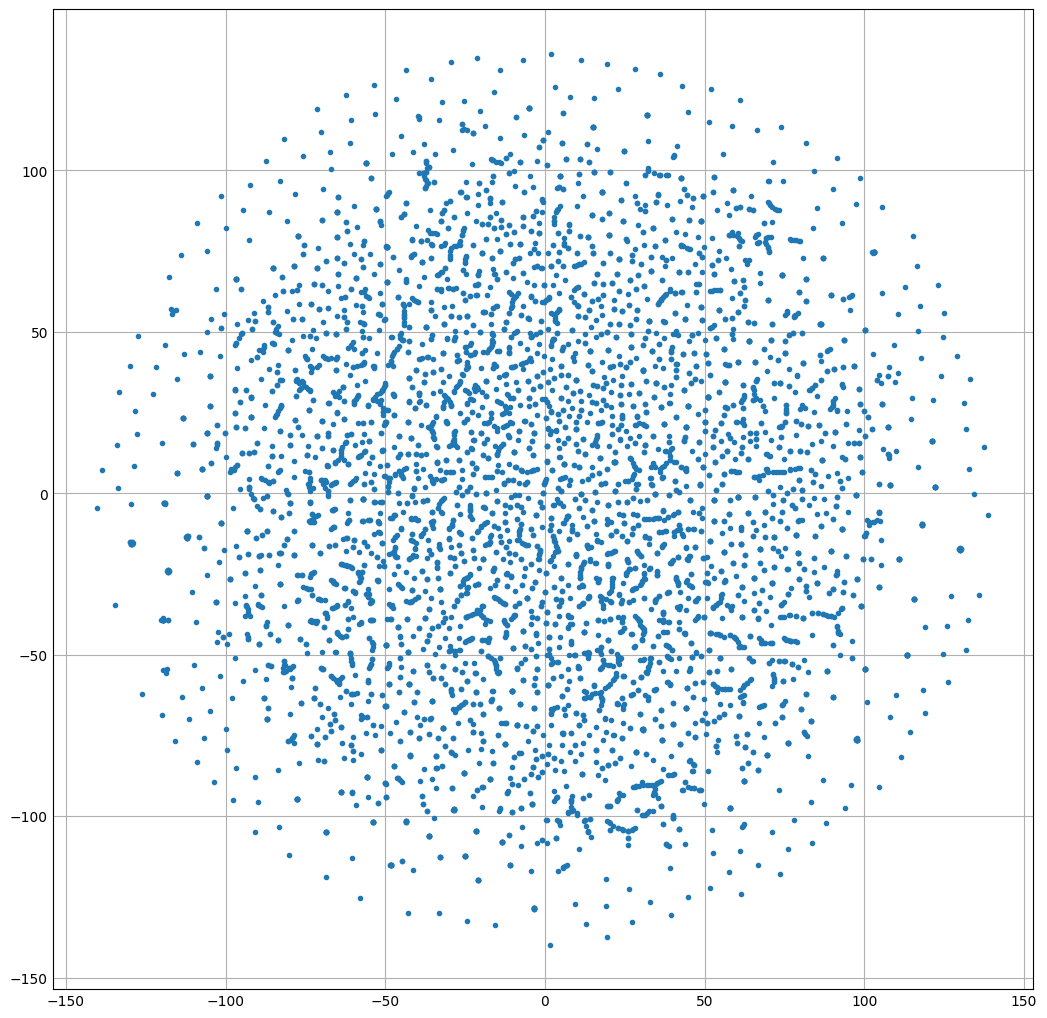

In [37]:
plt.figure(figsize=(10, 10))
plt.plot(X_embedded[:, 0], X_embedded[:, 1],'.')

In [12]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X)
X_embedded.shape

(2500, 3)

In [9]:
X_embedded

array([[-114.15575  ,   -3.8963041],
       [ -12.6493845,  -42.961662 ],
       [ -69.351555 ,  -27.073662 ],
       ...,
       [-102.39455  ,    6.4707303],
       [  83.497406 ,   48.904526 ],
       [ -86.3947   ,  -29.211287 ]], dtype=float32)

# 3D - проекция признакого пространства


In [ ]:
plt.style.use('_mpl-gallery')

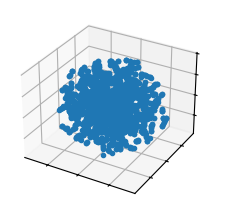

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], '.')

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()


# Генерация случайных кластеров


In [160]:
# np.random.seed(42)
import numpy as np
# Создаем 3 кластера
n_samples = 150


# Первый кластер - компактный
cluster1 = np.random.randn(n_samples // 3, 2) * 0.5 + np.array([0, 0])

# Второй кластер - вытянутый
cluster2 = np.random.randn(n_samples // 3, 2) * np.array([0.5, 1.5]) + np.array([3, 0])

# Третий кластер - разреженный
cluster3 = np.random.randn(n_samples // 3, 2) * 0.8 + np.array([0, 4])

# Объединяем кластеры
X_tt = np.vstack([cluster1, cluster2, cluster3])

In [161]:
X_test = compute_distance_matrix(X_tt, 'euclidean')

Гистограмма расстояний:


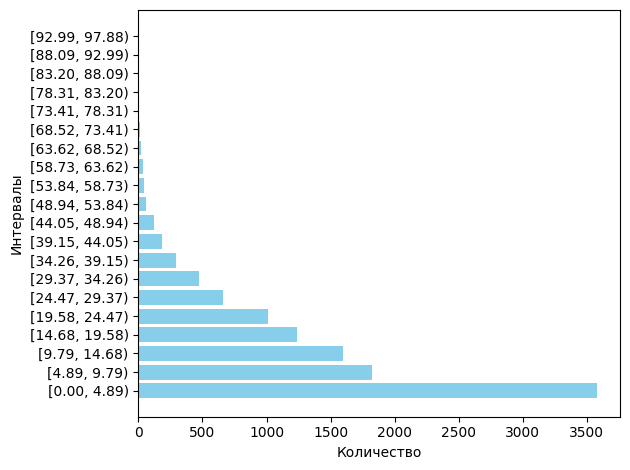

In [162]:
build_distance_histogram(X_test)

In [163]:
import matplotlib.pyplot as plt
def plot_clusters(X: np.array, clusters, title: str = 'Clustering Results') -> None:
    if X.shape[1] != 2:
        raise ValueError("This plotting function is only for 2D data")
    
    plt.figure(figsize=(10, 6))
    
    # Выбор цветов для кластеров
    colors = plt.cm.tab10(np.linspace(0, 1, len(clusters)))
    
    # Построение точек данных
    for cluster_id in range(len(clusters)):
        cluster_points = np.take(X_tt, clusters[cluster_id], 0)
        plt.scatter(
            cluster_points[:, 0], 
            cluster_points[:, 1], 
            s=50, 
            color=colors[cluster_id], 
            label=f'Cluster {cluster_id}'
        )
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Демонстрация работы алгоритма на произвольных кластерах



Clustering with threshold = 0.5
Number of clusters found: 9


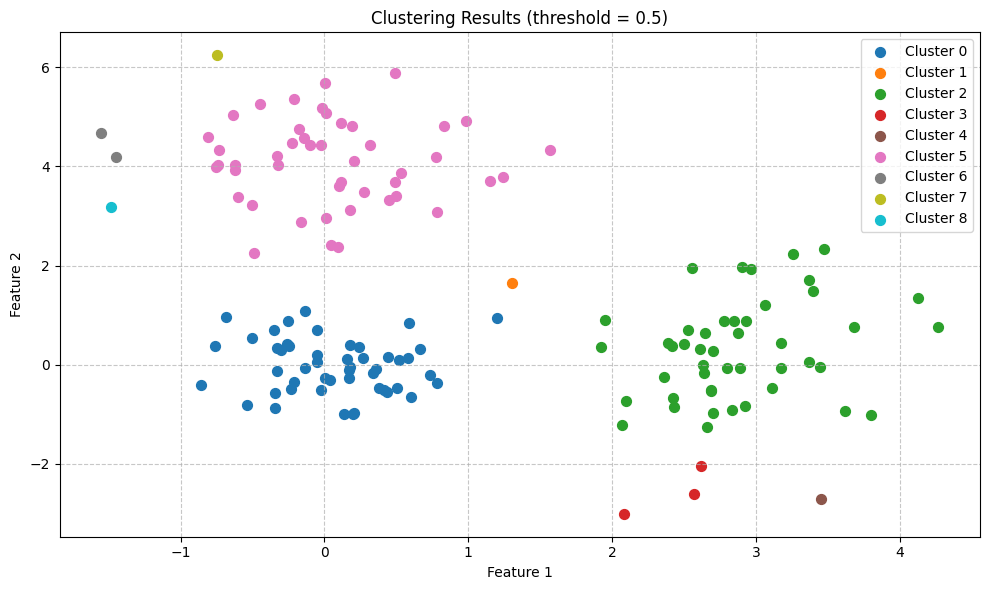


Clustering with threshold = 1
Number of clusters found: 2


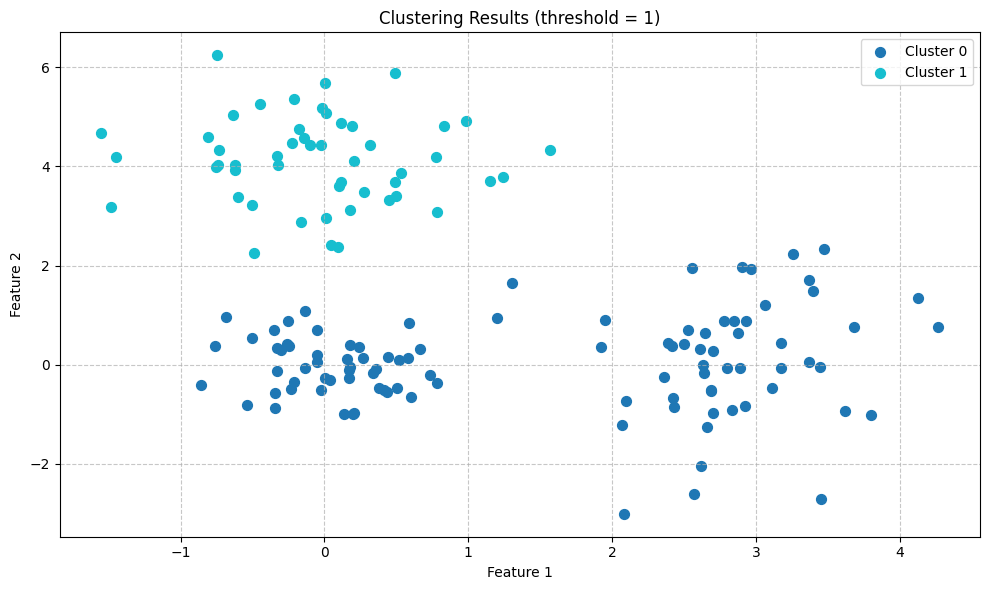


Clustering with threshold = 2
Number of clusters found: 1


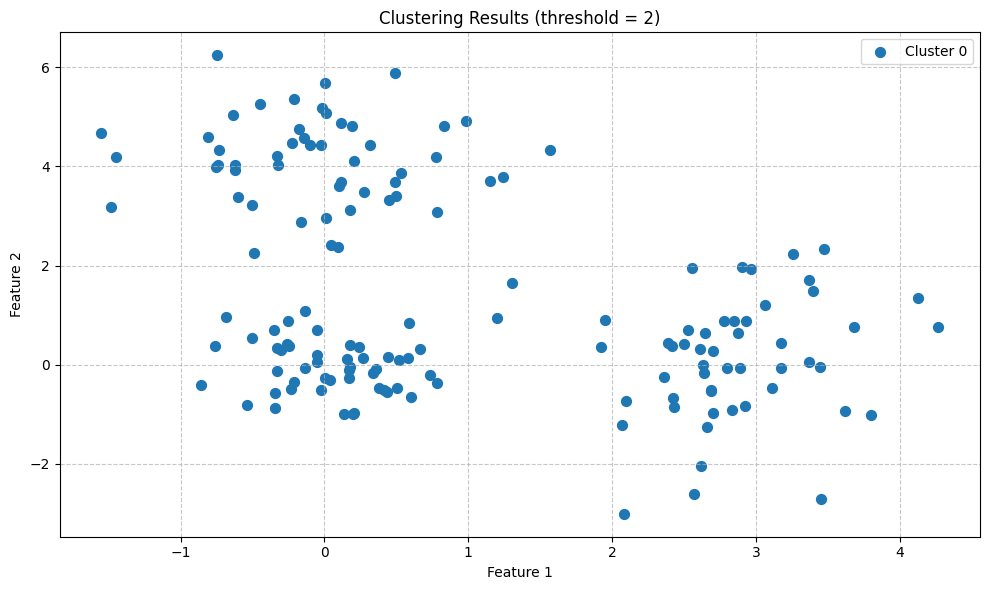


Clustering with threshold = 3
Number of clusters found: 1


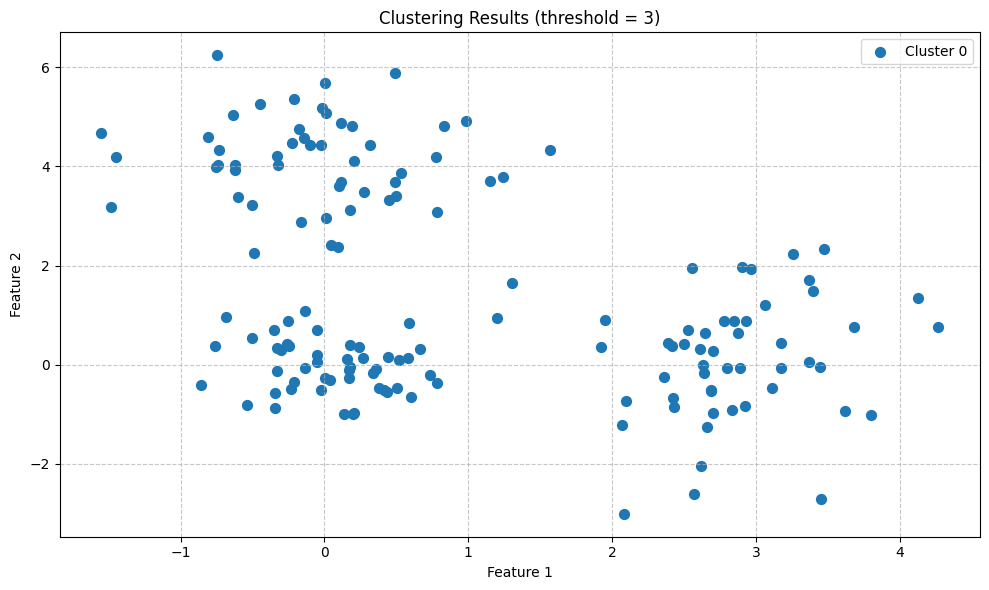


Clustering with threshold = 6
Number of clusters found: 1


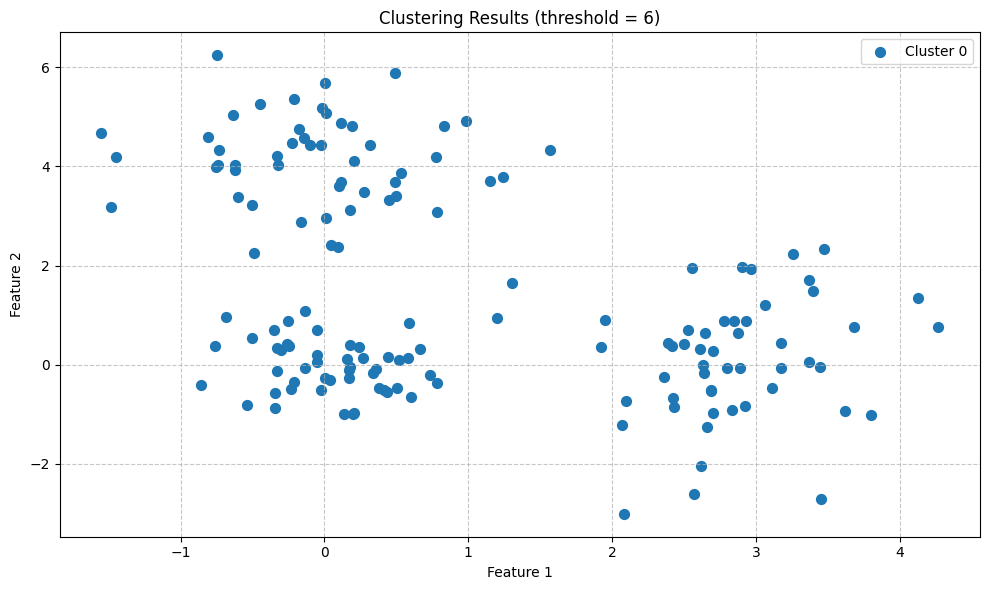


Clustering with threshold = 12
Number of clusters found: 1


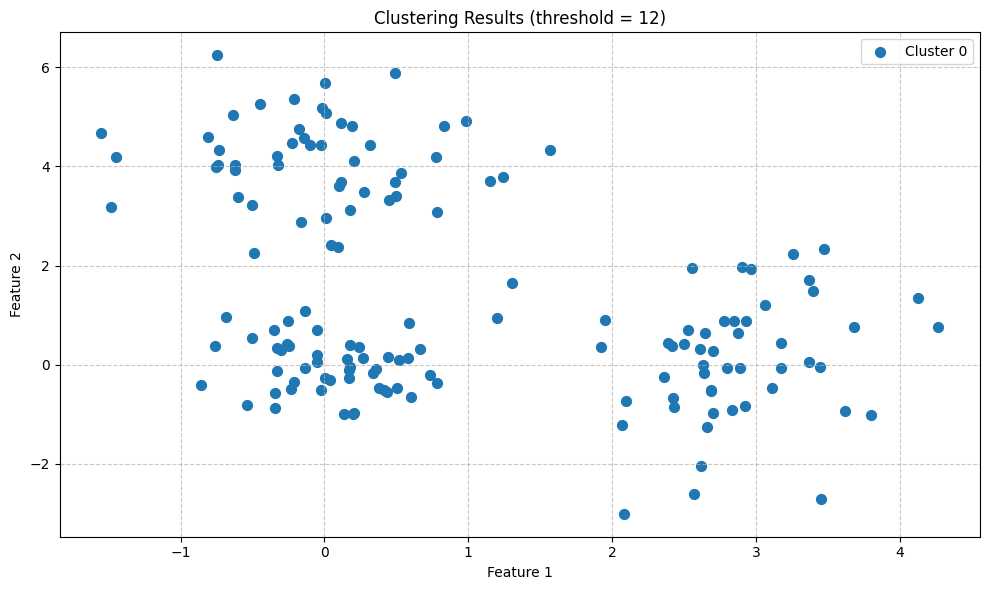

In [ ]:
# Применяем алгоритм кластеризации с разными параметрами
for threshold in [0.5, 1, 2, 3, 6, 12]:
    print(f"\nClustering with threshold = {threshold}")

    # Выполняем кластеризацию
    clustering = CorrelationPleiadesClusteringSimple(X_test)
    clusters = clustering.cluster_with_threshold(threshold=threshold)
    
    # Выводим информацию о результатах
    print(f"Number of clusters found: {len(clusters)}")
    # Визуализируем результаты
    plot_clusters(np.array(X_tt), clusters, f'Clustering Results (threshold = {threshold})')

# Мера близости: Манхэттенское расстояние


In [69]:
X_t = compute_distance_matrix(X.values, 'manhattan')

Гистограмма расстояний:


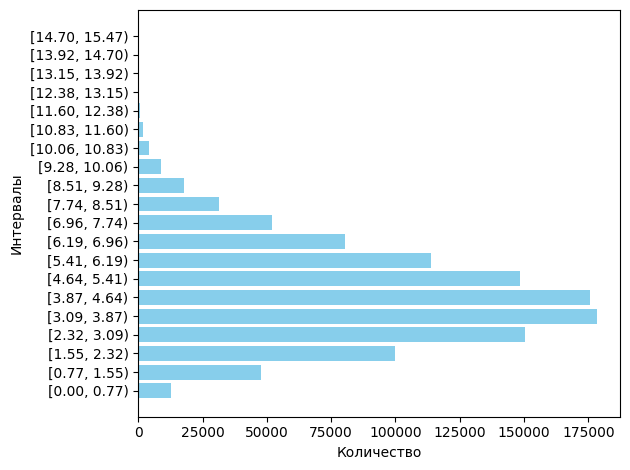

In [166]:
build_distance_histogram(X_t)

Порог: 9.15, Кластеры: 1, Ошибка: 2462.2615
Порог: 8.10, Кластеры: 1, Ошибка: 2462.2615
Порог: 7.10, Кластеры: 1, Ошибка: 2462.2615
Порог: 6.10, Кластеры: 3, Ошибка: 2448.6872
Порог: 5.50, Кластеры: 5, Ошибка: 2436.8517
Порог: 4.30, Кластеры: 22, Ошибка: 2348.7576
Порог: 4.00, Кластеры: 30, Ошибка: 2313.2670
Порог: 3.50, Кластеры: 52, Ошибка: 2220.4775
Порог: 3.30, Кластеры: 62, Ошибка: 2175.9815
Порог: 3.01, Кластеры: 90, Ошибка: 2064.6116
Порог: 0.90, Кластеры: 802, Ошибка: 262.0037
Порог: 0.50, Кластеры: 1055, Ошибка: 90.6000


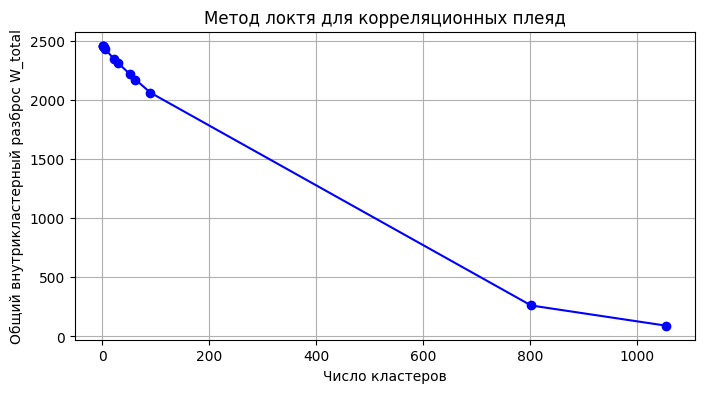

[2462.261511171701,
 2462.261511171701,
 2462.2615111717005,
 2448.687245009216,
 2436.851663951123,
 2348.7575737421794,
 2313.2670085776485,
 2220.4774918201906,
 2175.981507412366,
 2064.6116146874356,
 262.0036628715244,
 90.60000552644524]

In [71]:
thresholds = [0.5,0.9,3.01, 3.3, 3.5, 4.0, 4.3, 5.5, 6.1, 7.1, 8.1, 9.15]
elbow_for_correlation_pleiades(X_t, thresholds[::-1])

Threshold=6.10, Clusters=3, CH Score=4.15
Threshold=5.50, Clusters=5, CH Score=3.90
Threshold=4.30, Clusters=22, CH Score=3.40
Threshold=4.00, Clusters=30, CH Score=3.26
Threshold=3.50, Clusters=52, CH Score=3.09
Threshold=3.30, Clusters=62, CH Score=3.10
Threshold=3.01, Clusters=90, CH Score=3.05
Threshold=0.90, Clusters=802, CH Score=7.32
Threshold=0.50, Clusters=1055, CH Score=11.05

✅ Best threshold by Calinski-Harabasz Index: 0.50 with score 11.05


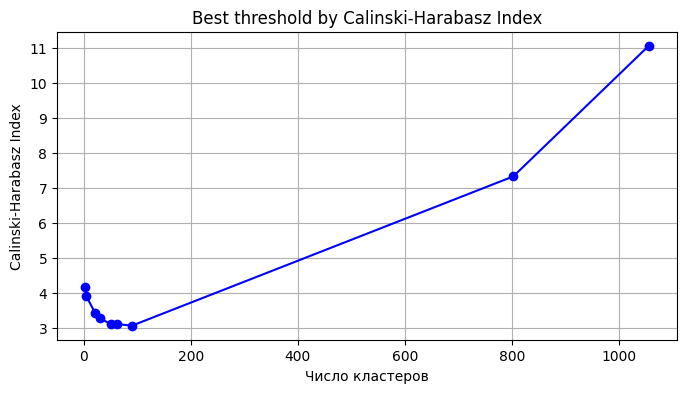

In [72]:
best_threshold, score_dict = global_stopping_rule_calinski_custom(X_t, X, thresholds[::-1])

Гистограмма расстояний:


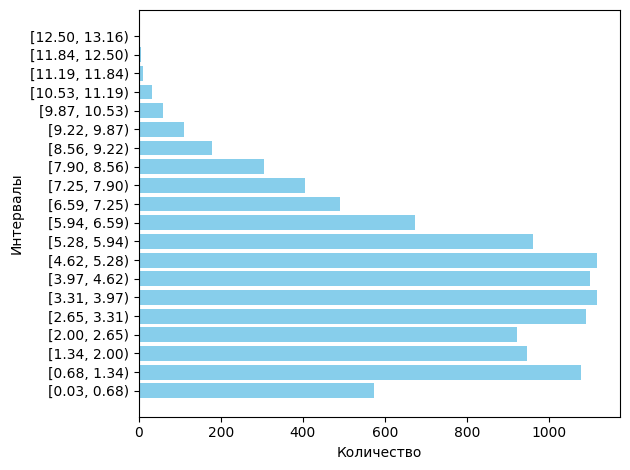

In [170]:
X_test = compute_distance_matrix(X_tt, 'manhattan')
build_distance_histogram(X_test)


Clustering with threshold = 0.1
Number of clusters found: 131


C:\Users\po6wi\AppData\Local\Temp\ipykernel_30692\2060412387.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


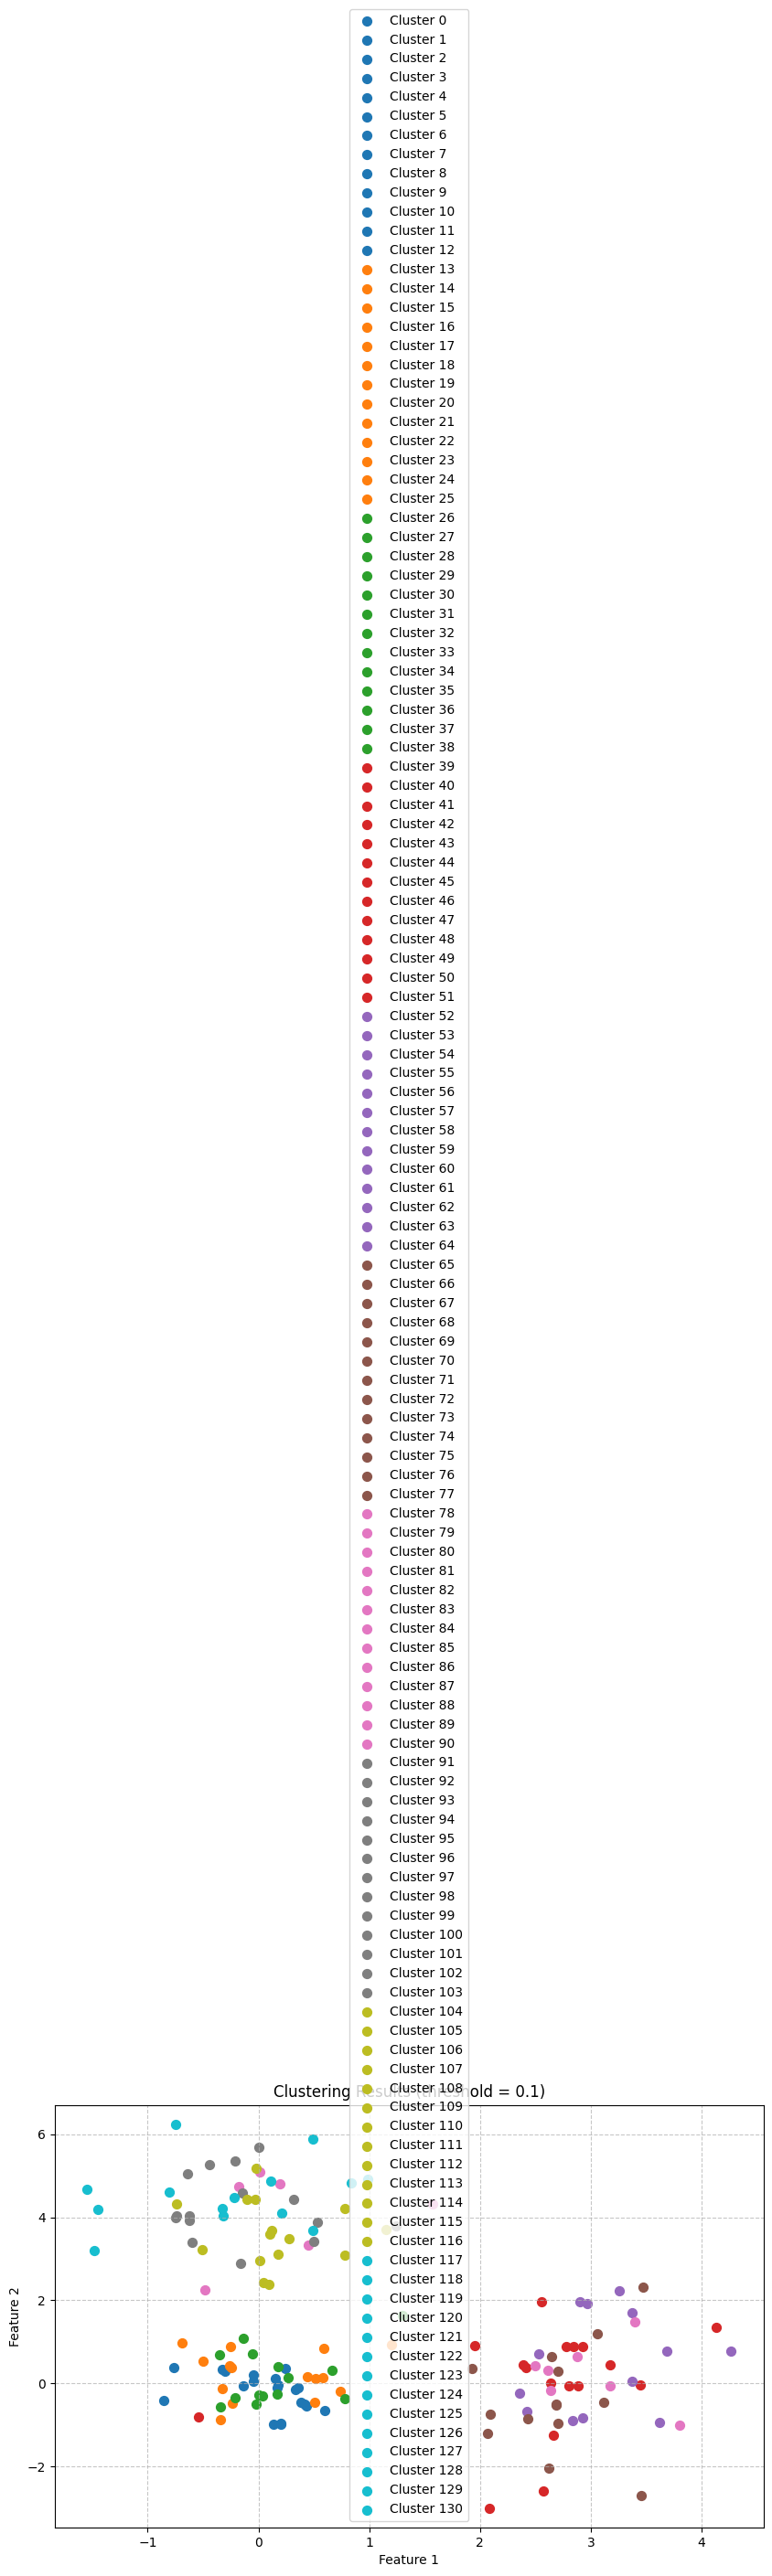


Clustering with threshold = 0.5
Number of clusters found: 37


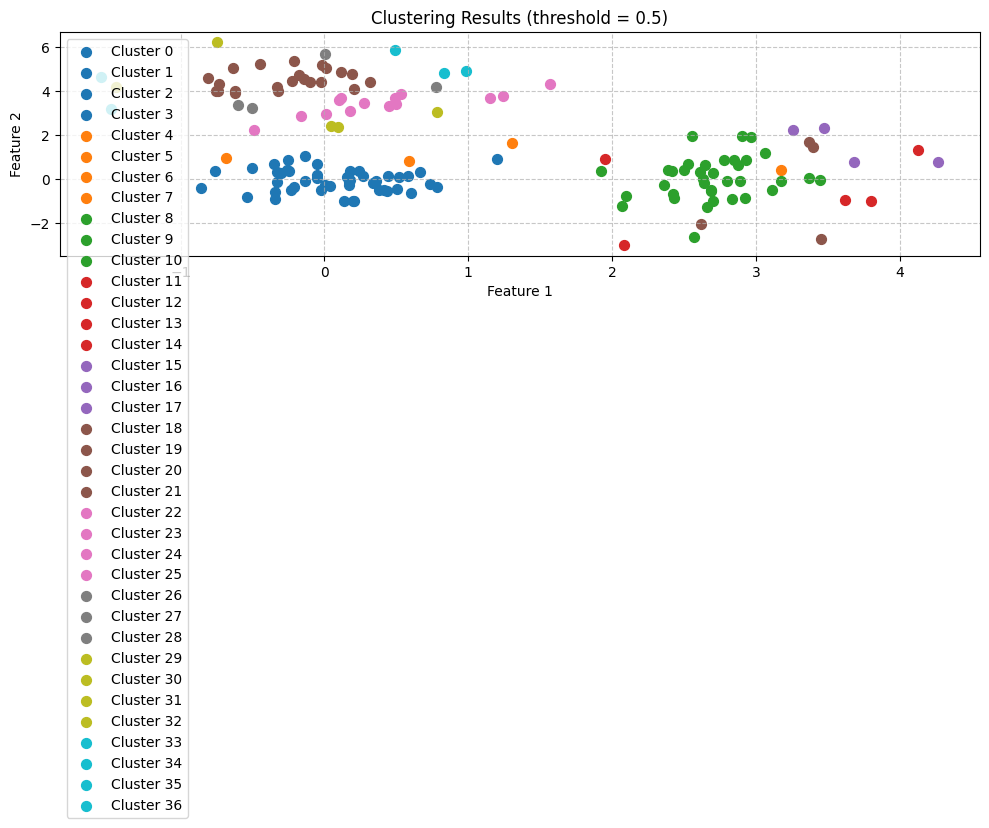


Clustering with threshold = 0.9
Number of clusters found: 5


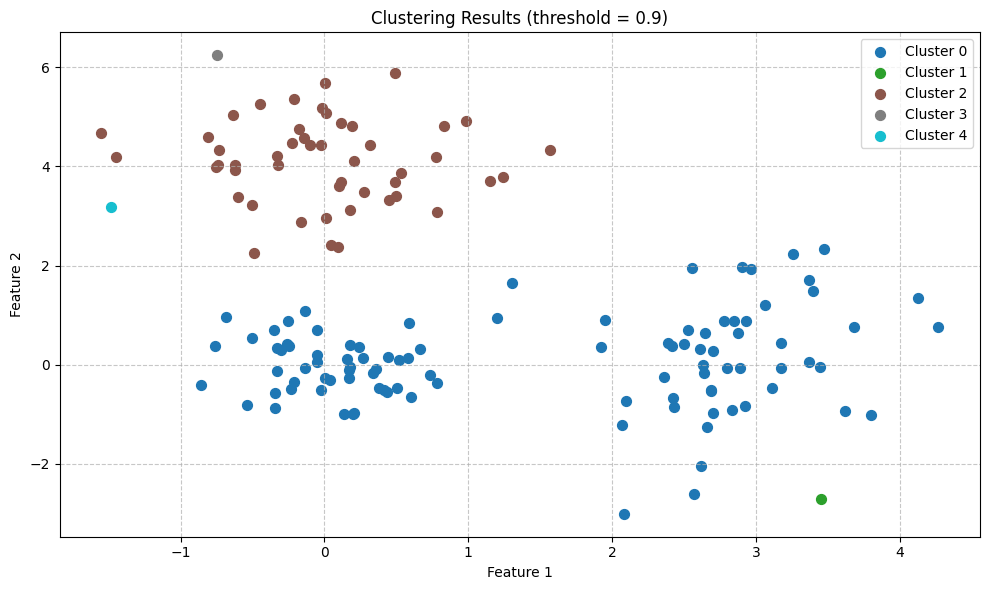


Clustering with threshold = 1.5
Number of clusters found: 1


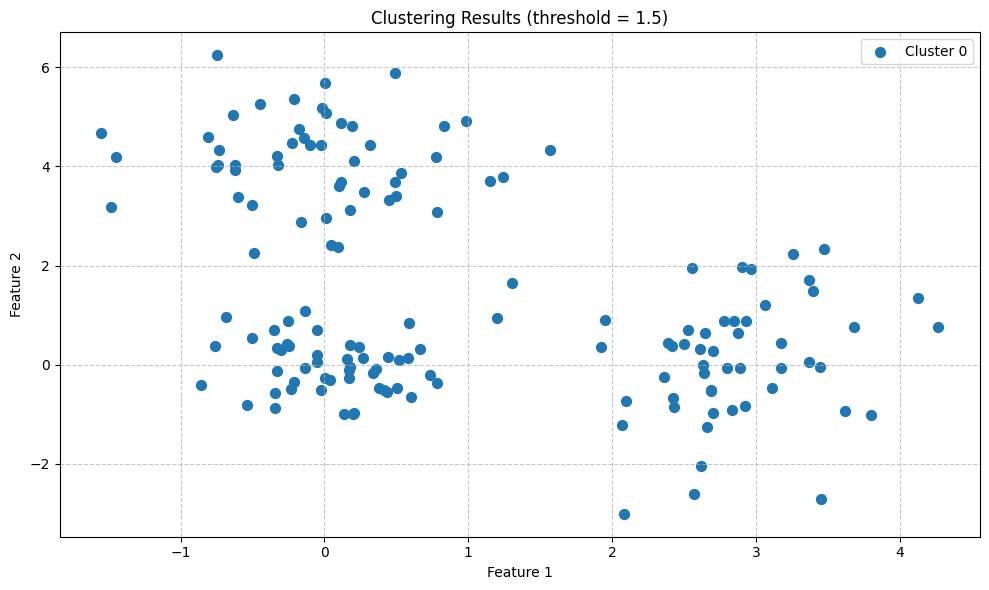


Clustering with threshold = 2.7
Number of clusters found: 1


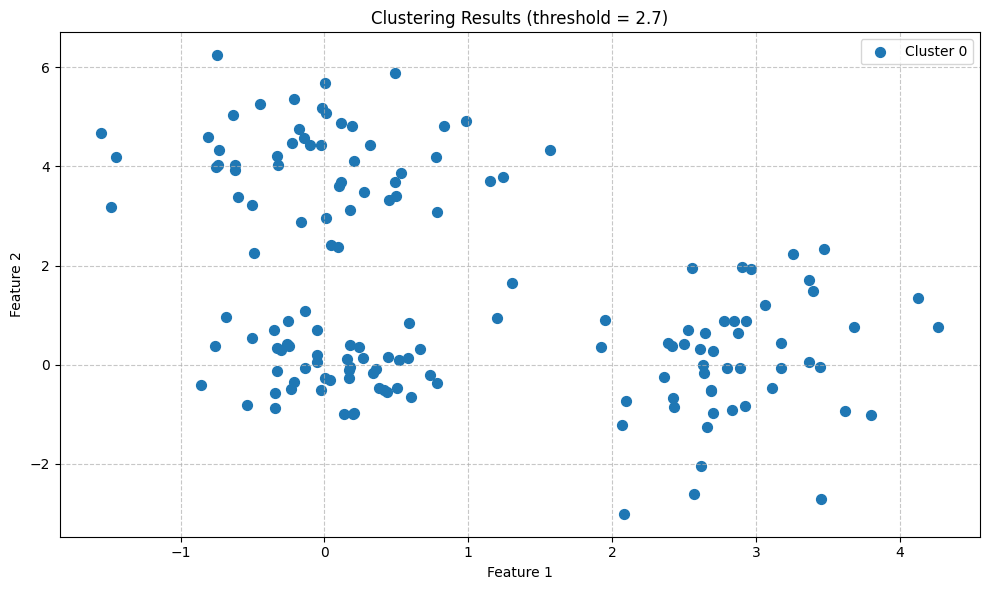


Clustering with threshold = 3.9
Number of clusters found: 1


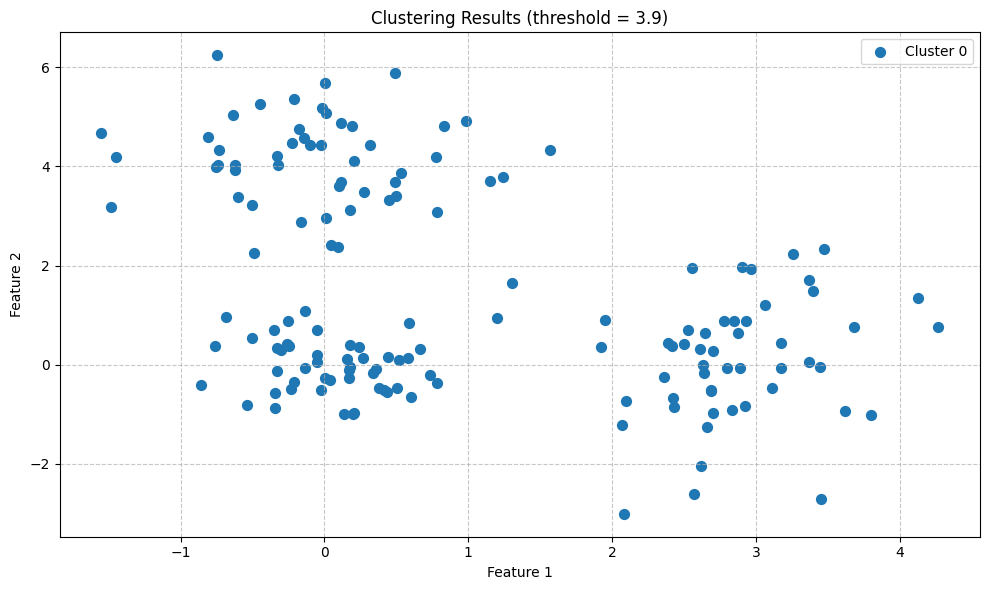


Clustering with threshold = 4.95
Number of clusters found: 1


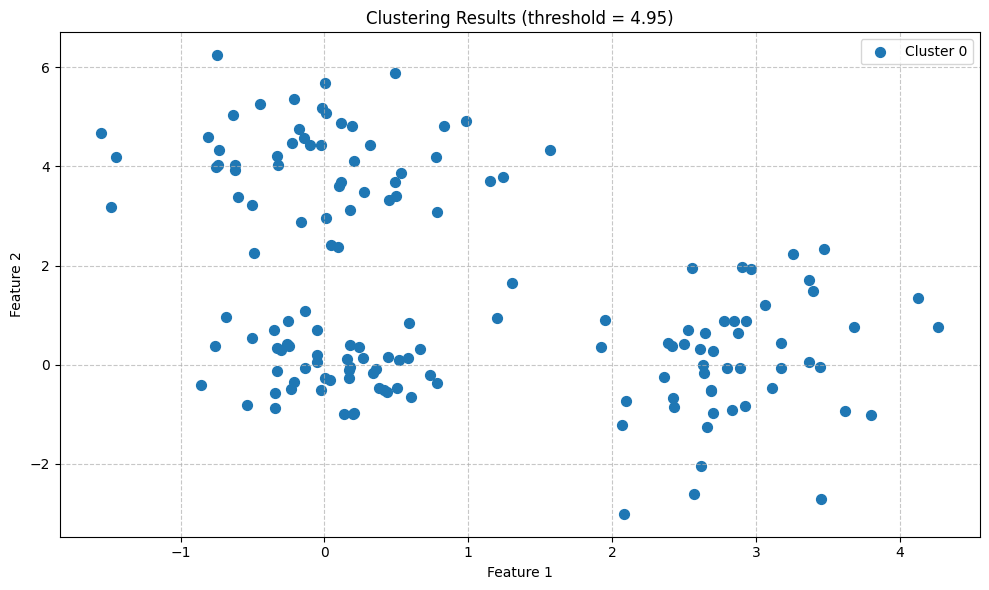


Clustering with threshold = 5.99
Number of clusters found: 1


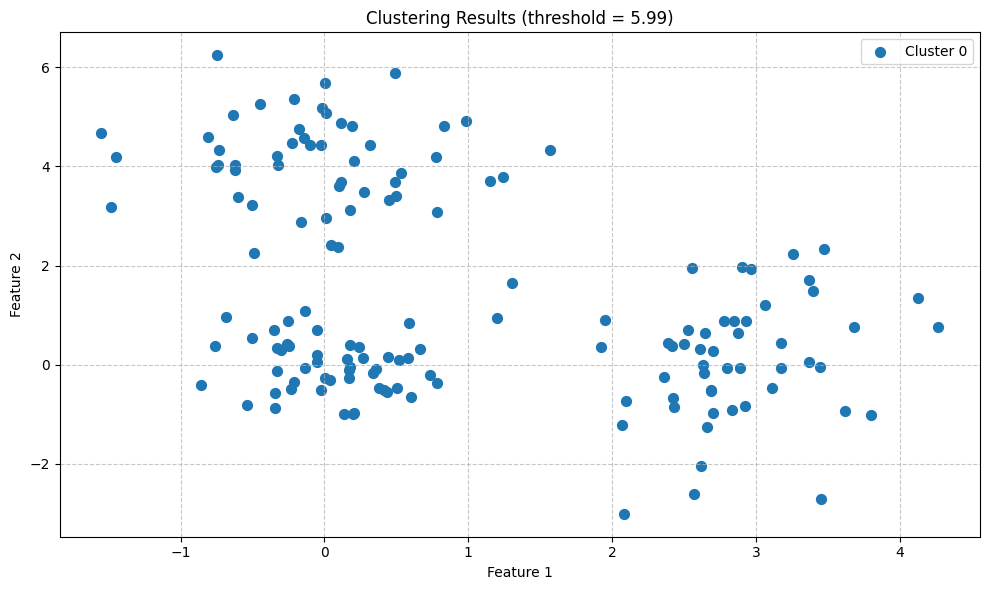


Clustering with threshold = 6.15
Number of clusters found: 1


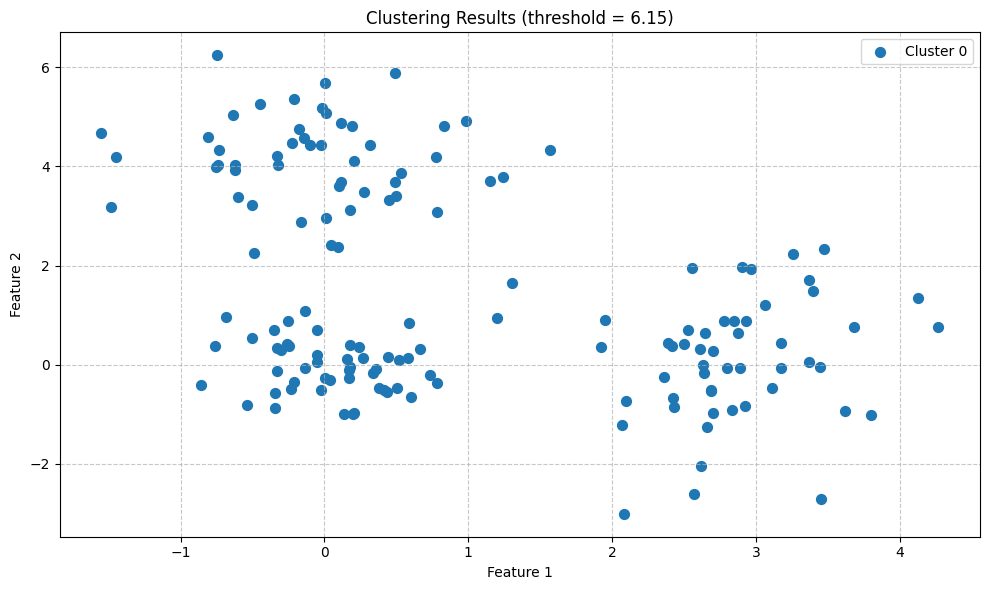

In [171]:

# Применяем алгоритм кластеризации с разными параметрами
for threshold in [0.1, 0.5,0.9, 1.5, 2.7, 3.9, 4.95, 5.99, 6.15]:
    print(f"\nClustering with threshold = {threshold}")

    # Выполняем кластеризацию
    clustering = CorrelationPleiadesClusteringSimple(X_test)
    clusters = clustering.cluster_with_threshold(threshold=threshold)
    
    # Выводим информацию о результатах
    print(f"Number of clusters found: {len(clusters)}")
    # Визуализируем результаты
    plot_clusters(np.array(X_tt), clusters, f'Clustering Results (threshold = {threshold})')

# Мера близости: расстояние Чебышова


In [73]:
X_t = compute_distance_matrix(X.values, 'chebyshev')

Гистограмма расстояний:


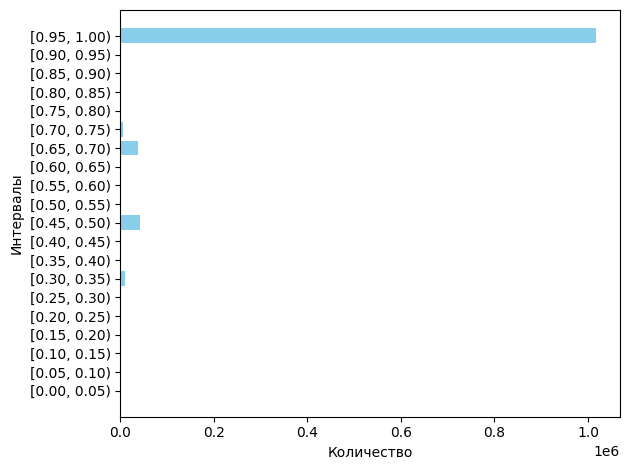

In [173]:
build_distance_histogram(X_t)

Порог: 1.10, Кластеры: 1, Ошибка: 2462.2615
Порог: 1.05, Кластеры: 1, Ошибка: 2462.2615
Порог: 1.03, Кластеры: 1, Ошибка: 2462.2615
Порог: 1.01, Кластеры: 1, Ошибка: 2462.2615
Порог: 0.50, Кластеры: 859, Ошибка: 166.2429
Порог: 0.40, Кластеры: 873, Ошибка: 157.7158
Порог: 0.30, Кластеры: 1123, Ошибка: 25.0706
Порог: 0.20, Кластеры: 1249, Ошибка: 4.0907
Порог: 0.10, Кластеры: 1289, Ошибка: 1.3779
Порог: 0.00, Кластеры: 1500, Ошибка: 0.0000


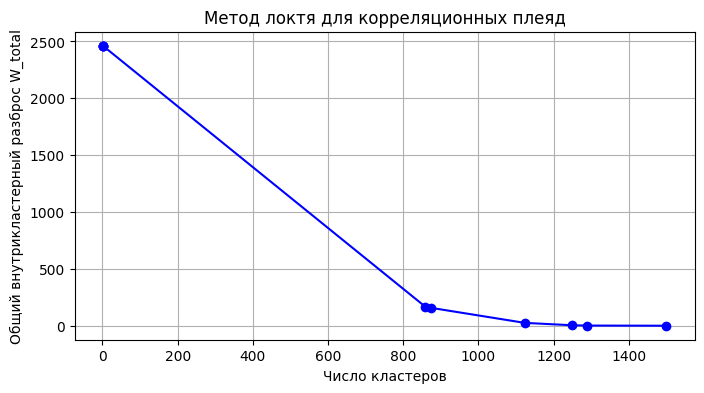

[2462.261511171701,
 2462.261511171701,
 2462.261511171701,
 2462.261511171701,
 166.24286595858499,
 157.7158065668977,
 25.070622305761617,
 4.090661382460943,
 1.377921792150303,
 0.0]

In [81]:
thresholds = [0,0.1,0.2,0.3,0.4,0.5,1.01,1.03, 1.05, 1.1]
elbow_for_correlation_pleiades(X_t, thresholds[::-1])

Threshold=0.50, Clusters=859, CH Score=10.32
Threshold=0.40, Clusters=873, CH Score=10.51
Threshold=0.30, Clusters=1123, CH Score=32.66
Threshold=0.20, Clusters=1249, CH Score=120.86
Threshold=0.10, Clusters=1289, CH Score=292.57

✅ Best threshold by Calinski-Harabasz Index: 0.10 with score 292.57


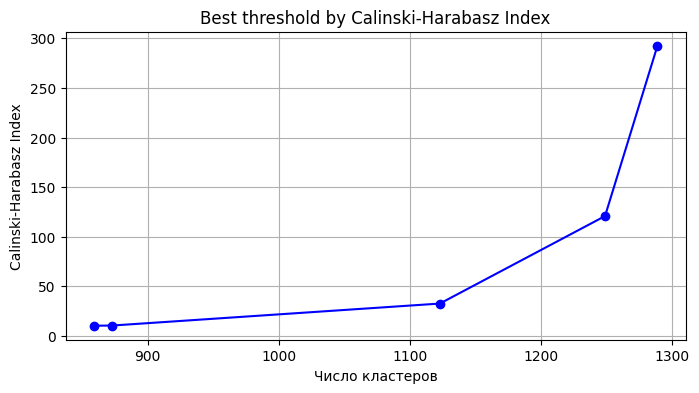

In [82]:
best_threshold, score_dict = global_stopping_rule_calinski_custom(X_t, X, thresholds[::-1])

Гистограмма расстояний:


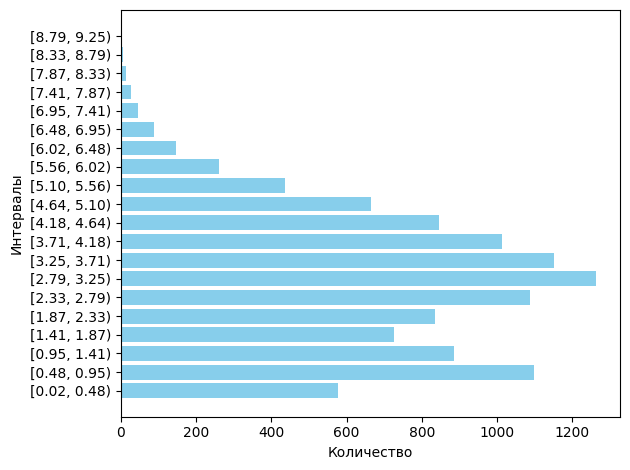

In [179]:
X_test = compute_distance_matrix(X_tt, 'chebyshev')
build_distance_histogram(X_test)


Clustering with threshold = 0.1
Number of clusters found: 117


C:\Users\po6wi\AppData\Local\Temp\ipykernel_30692\2060412387.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


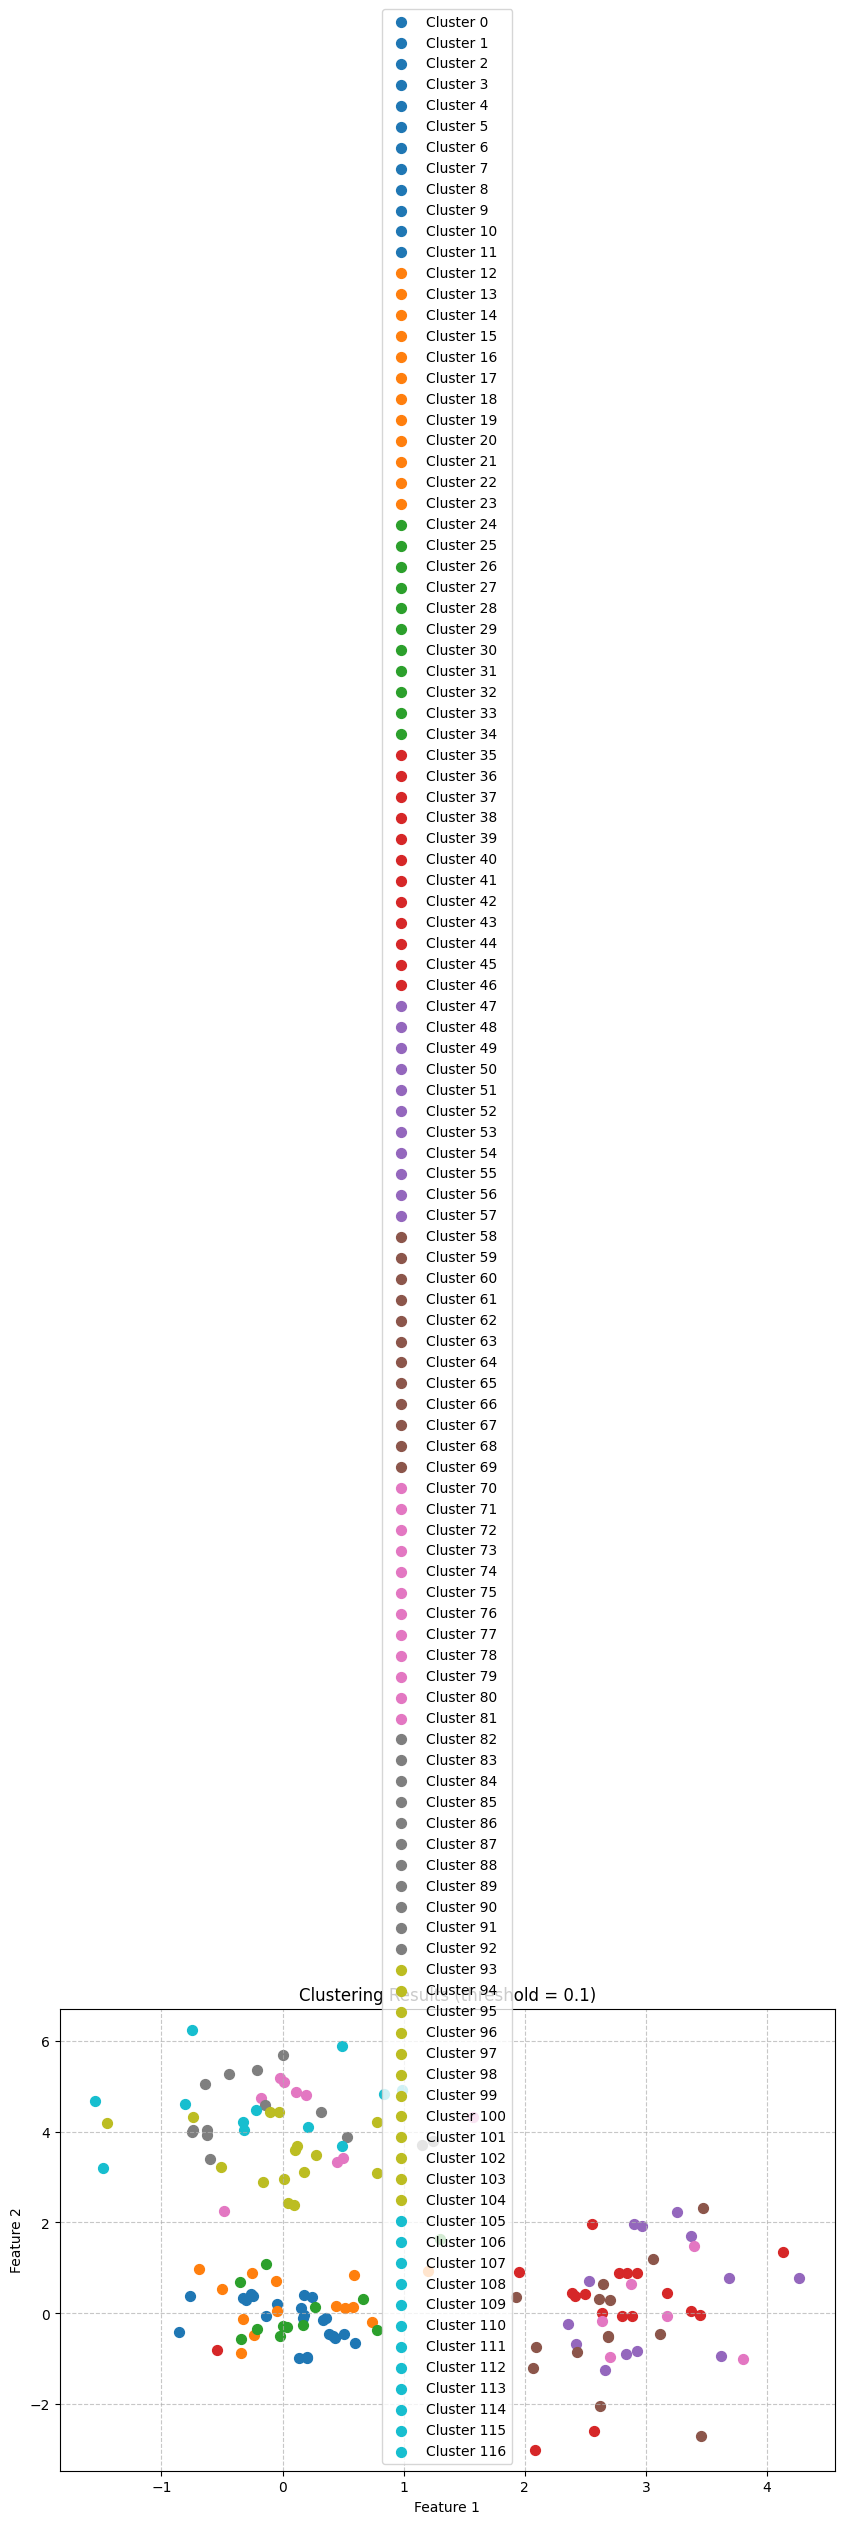


Clustering with threshold = 0.5
Number of clusters found: 18


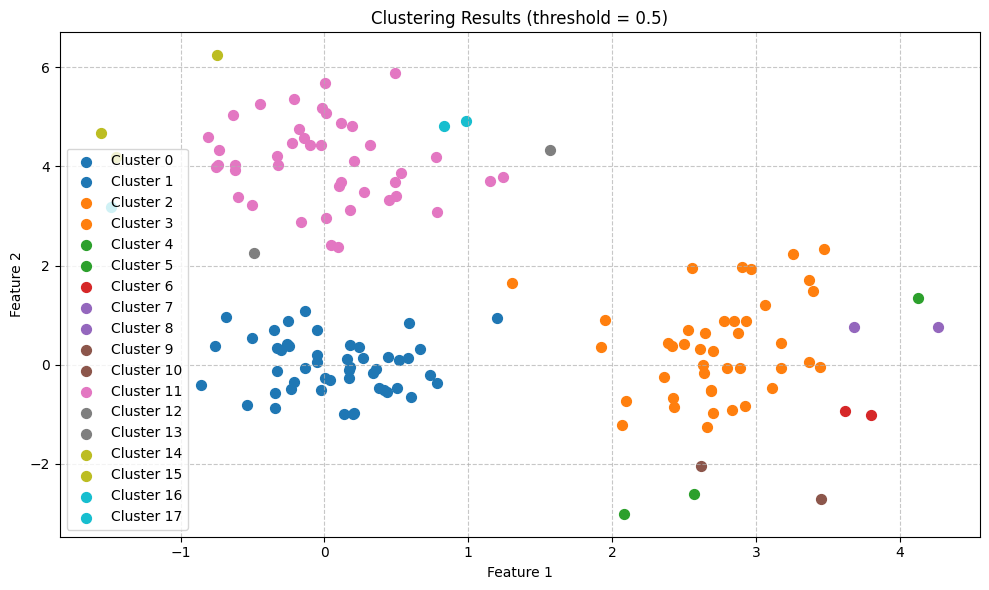


Clustering with threshold = 0.9
Number of clusters found: 2


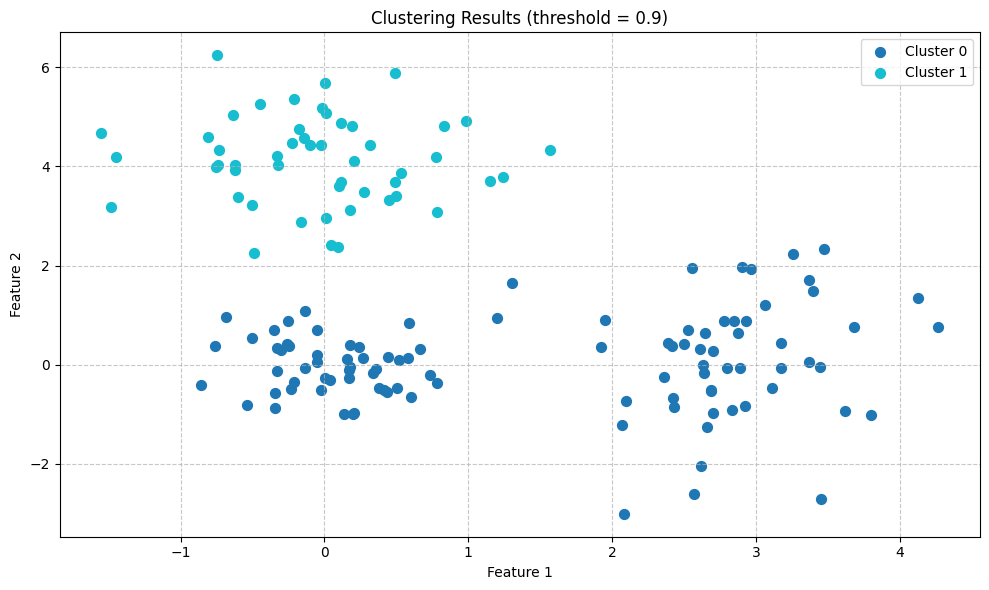


Clustering with threshold = 1.5
Number of clusters found: 1


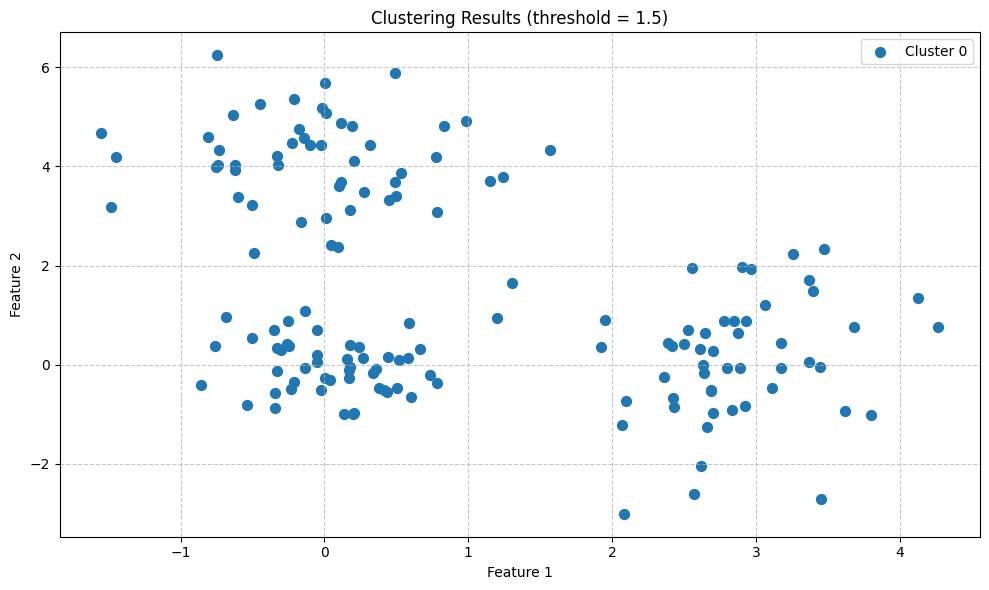


Clustering with threshold = 2.7
Number of clusters found: 1


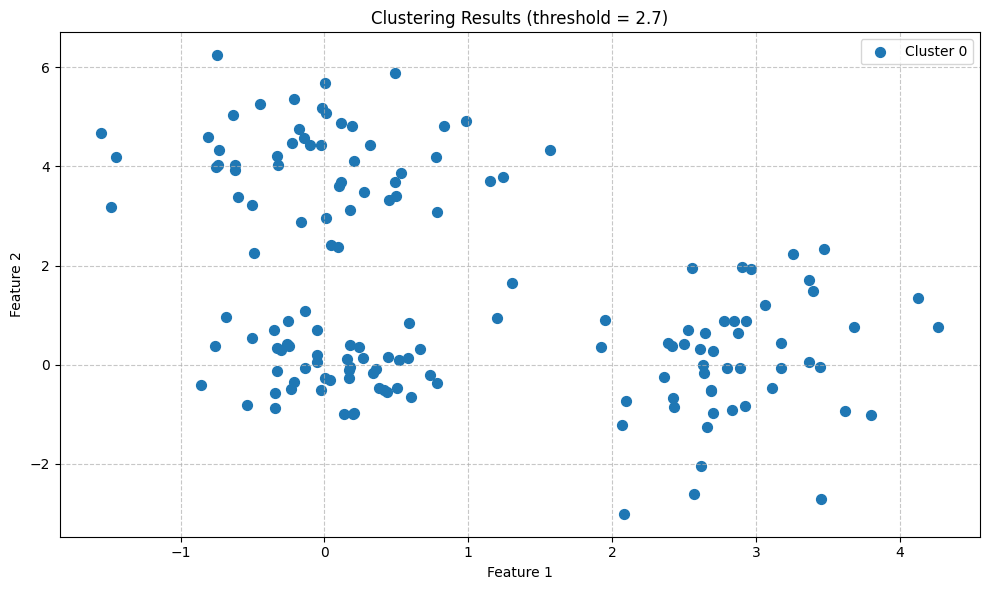


Clustering with threshold = 3.9
Number of clusters found: 1


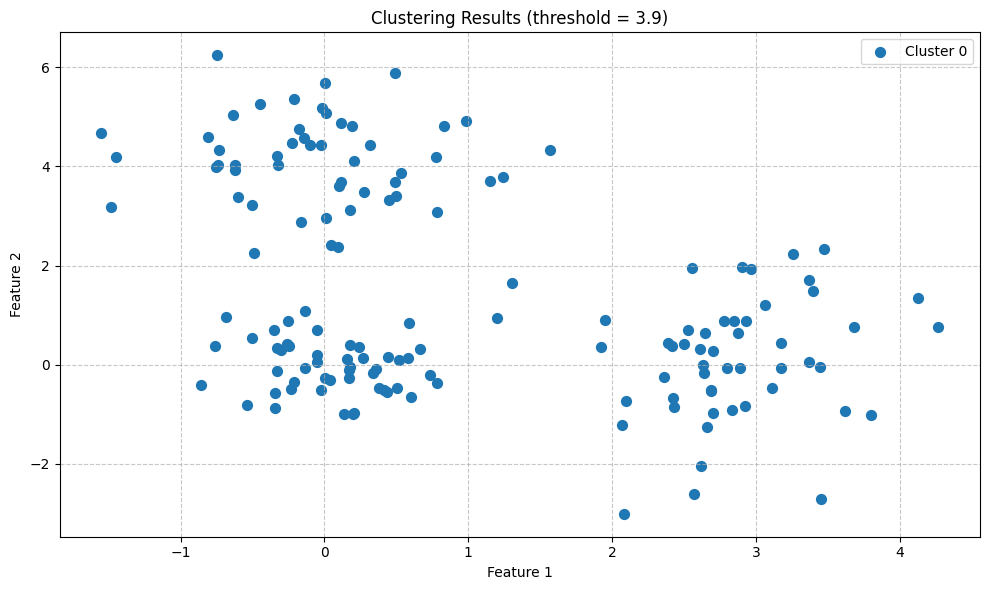


Clustering with threshold = 4.95
Number of clusters found: 1


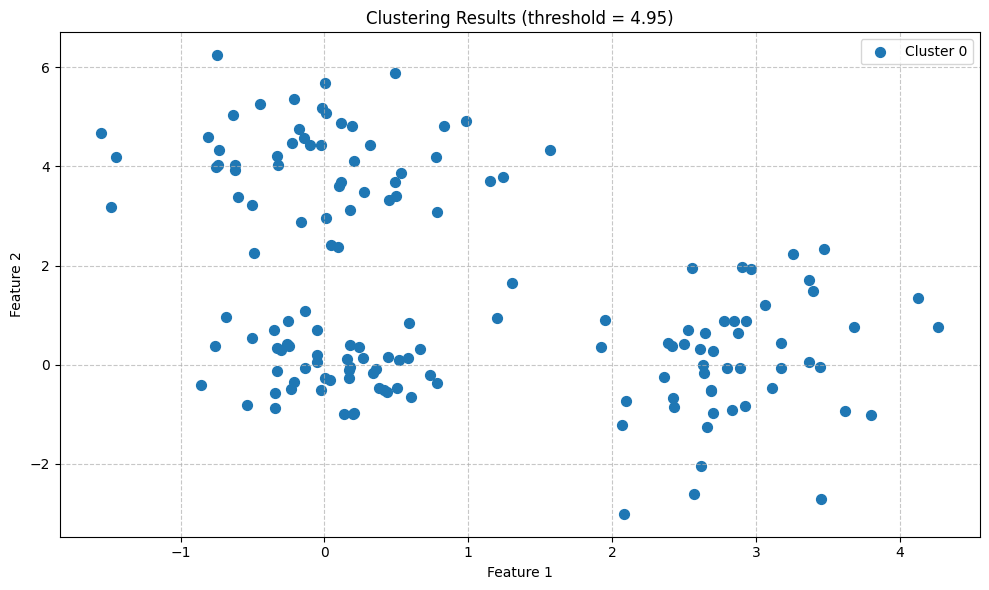


Clustering with threshold = 5.99
Number of clusters found: 1


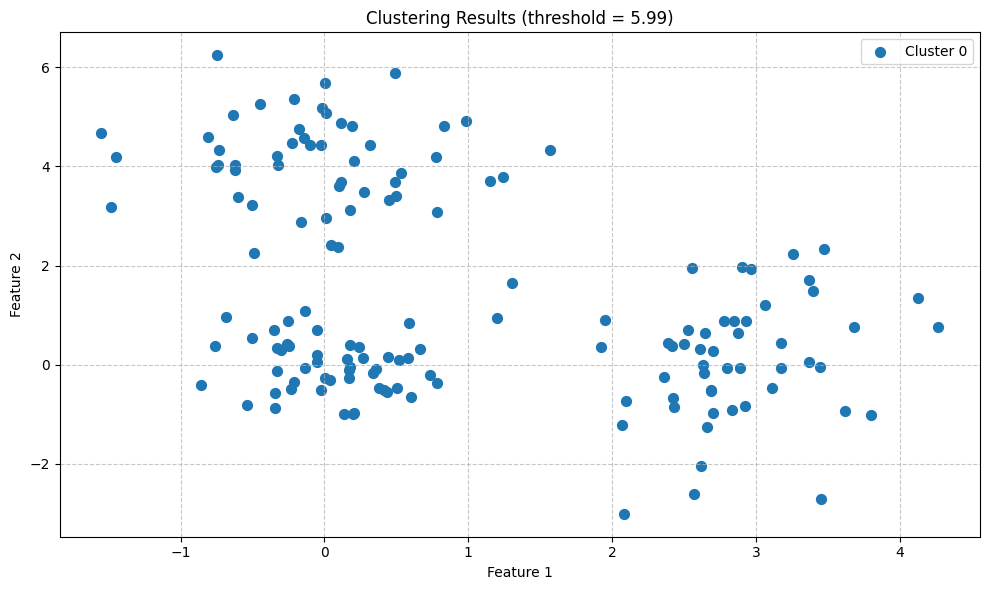


Clustering with threshold = 6.15
Number of clusters found: 1


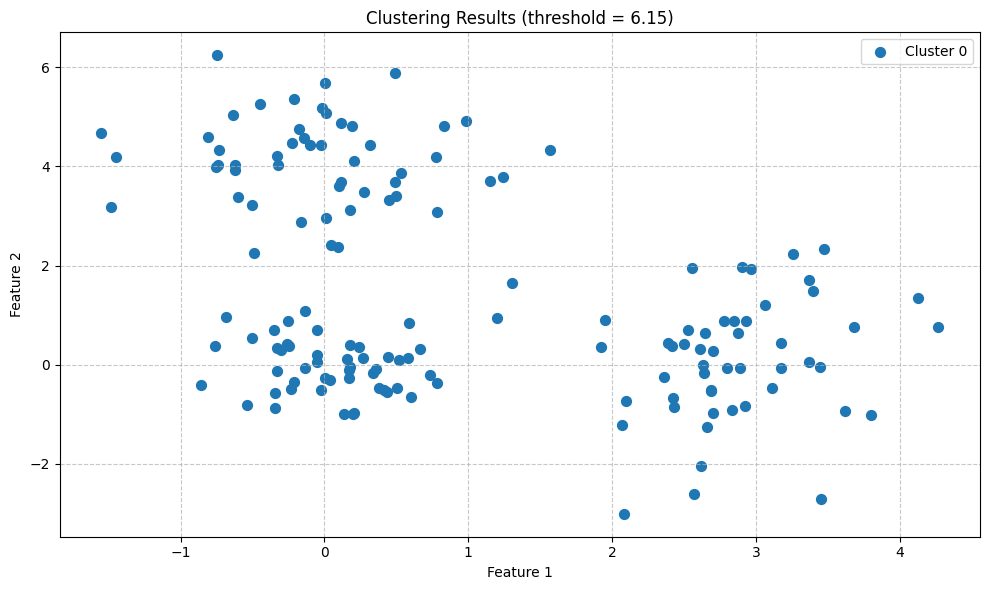

In [180]:
# Применяем алгоритм кластеризации с разными параметрами
for threshold in [0.1, 0.5,0.9, 1.5, 2.7, 3.9, 4.95, 5.99, 6.15]:
    print(f"\nClustering with threshold = {threshold}")

    # Выполняем кластеризацию
    clustering = CorrelationPleiadesClusteringSimple(X_test)
    clusters = clustering.cluster_with_threshold(threshold=threshold)
    
    # Выводим информацию о результатах
    print(f"Number of clusters found: {len(clusters)}")
    # Визуализируем результаты
    plot_clusters(np.array(X_tt), clusters, f'Clustering Results (threshold = {threshold})')